### Модель перцептрона, способную классифицировать качество связи на основе данных телекоммуникаций

In [3]:
import numpy as np

In [6]:
np.random.seed(42)

#  генерация данных 
signal = np.random.uniform(-90, -60, 100)
delay = np.random.uniform(10, 200, 100)
noise = np.random.uniform(0, 30, 100)

y = np.where((signal > -70) & (delay < 100) & (noise < 20), 1, 0)
x = np.column_stack((signal, delay, noise))
x

array([[-7.87637964e+01,  1.59715453e+01,  1.92609494e+01],
       [-6.14785708e+01,  1.30917978e+02,  2.52419895e+00],
       [-6.80401817e+01,  6.97276364e+01,  4.84886142e+00],
       [-7.20402455e+01,  1.06628431e+02,  2.69566257e+01],
       [-8.53194408e+01,  1.82437630e+02,  1.81928718e+01],
       [-8.53201644e+01,  5.73655235e+01,  2.75911548e-01],
       [-8.82574916e+01,  8.79727554e+01,  3.04414629e+00],
       [-6.40147156e+01,  1.53554716e+02,  1.99050531e+01],
       [-7.19665496e+01,  5.34716514e+01,  1.51847515e-01],
       [-6.87578227e+01,  2.46261829e+01,  4.82424154e+00],
       [-8.93824652e+01,  6.50527761e+01,  1.64620137e+01],
       [-6.09027044e+01,  4.06320446e+01,  2.07568559e+01],
       [-6.50267208e+01,  1.86642554e+02,  1.95588378e+01],
       [-8.36298267e+01,  1.63542872e+02,  6.72807928e+00],
       [-8.45452510e+01,  1.30346714e+02,  2.13653766e+01],
       [-8.44978647e+01,  1.75577512e+02,  7.11747262e+00],
       [-8.08727327e+01,  1.62697695e+02

In [5]:
# Нормализуем данные

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled

array([[-0.32311215, -1.59922959,  0.42619627],
       [ 1.62343393,  0.47516709, -1.48468335],
       [ 0.88450935, -0.62911286, -1.21927041],
       [ 0.43404902,  0.03682243,  1.30483224],
       [-1.06136481,  1.40492361,  0.30425099],
       [-1.0614463 , -0.85220744, -1.74137635],
       [-1.39222838, -0.2998498 , -1.42531957],
       [ 1.33783032,  0.88368412,  0.49973531],
       [ 0.44234815, -0.92247874, -1.75554107],
       [ 0.80369344, -1.44304247, -1.22208133],
       [-1.51891535, -0.71347838,  0.10663429],
       [ 1.68828413, -1.15419048,  0.59698793],
       [ 1.22386509,  1.48080835,  0.46020699],
       [-0.87109182,  1.06393675, -1.00471507],
       [-0.97418076,  0.46485769,  0.66646437],
       [-0.96884443,  1.28112154, -0.96025699],
       [-0.5606064 ,  1.04868414, -0.65832525],
       [ 0.18437843, -1.06727306,  0.78398978],
       [-0.12917552,  1.35346506,  0.45223193],
       [-0.60456985,  0.14233381,  1.13586543],
       [ 0.478625  ,  1.06160435,  0.479

In [10]:

class Perceptron:
    def __init__(self, lerning_rate=0.01, n_iters=100):
        self.lr = lerning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, x, y):
        n_sample, n_festures = x.shape
        self.weights = np.zeros(n_festures)
        self.bias = 0 

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(x):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = 1 if linear_output >= 0 else 0 
                update = self.lr * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, x):
        linear_output = np.dot(x, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

In [ ]:
# разделяем данные
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [12]:
# обучаем модель на тестовых данных
perceptron = Perceptron(lerning_rate=0.01, n_iters=100)
perceptron.fit(x_train, y_train)


In [17]:
from sklearn.metrics import accuracy_score

y_pred = perceptron.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy * 100:.2f}%")



Точность модели: 95.00%


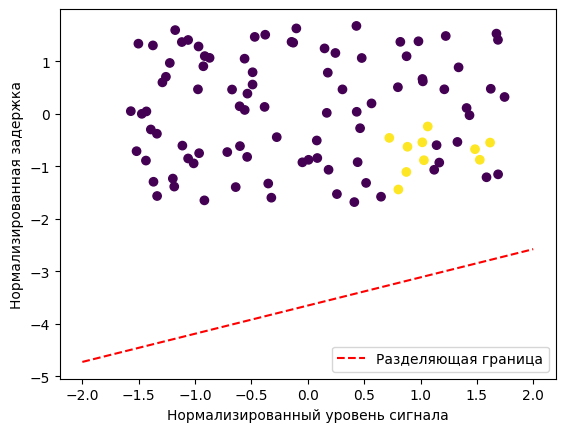

In [18]:
import matplotlib.pyplot as plt

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap="viridis")
x1 = np.linspace(-2, 2, 100)
x2 = -(perceptron.weights[0] * x1 + perceptron.bias) / perceptron.weights[1]

plt.plot(x1, x2, 'r--', label="Разделяющая граница")
plt.xlabel('Нормализированный уровень сигнала')
plt.ylabel('Нормализированная задержка')
plt.legend()
plt.show()